# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [192]:
# Dependencies and Setup (in alphabetical order)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Imports Sample
from random import sample 

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
LAT_RANGE   = (-90, 90)
LNG_RANGE   = (-180, 180)
SEED        = 2002

## Generate Cities List

In [193]:
# List for holding lat_lngs and cities
cities   = []

# Create a set of random lat and lng combinations
np.random.seed(SEED)

lats = np.random.uniform(low = -90.000, 
                         high = 90.000, 
                         size = 1500)

lngs = np.random.uniform(low = -180.000, 
                         high = 180.000, 
                         size = 1500)

lat_lngs = zip(lats, lngs)

In [194]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], 
                               lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
if len(cities) < 500:
    print("You don't have enough cities in your sample, change the value of 'SEED'")
else: 
    print(f"Your sample has {len(cities)} observations")
    


Your sample has 620 observations


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [195]:
# Seting parameters to access the wheather data
## Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

## Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [196]:
# Setting up lists to hold reponse info
temperature_f   = []
humidity_perc   = []
cloudiness_perc = []
wind_speed_mph  = []
latitude        = []
longitude       = []
city_list      = []

# Loop through the list of cities and perform a request for data on each

for city in cities:
    
    try:
        print(f"Gethering information for {city}")
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature_f.append(response['main']['temp'])
        humidity_perc.append(response['main']['humidity'])
        cloudiness_perc.append(response['clouds']['all'])
        wind_speed_mph.append(response['wind']['speed'])
    
    except (KeyError, IndexError):
        print("City not found. Skipping.")
        
    print("------------")



Gethering information for muzquiz
City not found. Skipping.
------------
Gethering information for westport
------------
Gethering information for puerto ayora
------------
Gethering information for touros
------------
Gethering information for kahului
------------
Gethering information for bluff
------------
Gethering information for north bend
------------
Gethering information for mataura
------------
Gethering information for punta arenas
------------
Gethering information for grand river south east
City not found. Skipping.
------------
Gethering information for chuy
------------
Gethering information for padang
------------
Gethering information for kapaa
------------
Gethering information for laguna
------------
Gethering information for beira
------------
Gethering information for hilo
------------
Gethering information for taree
------------
Gethering information for belushya guba
City not found. Skipping.
------------
Gethering information for amderma
City not found. Skipping

City not found. Skipping.
------------
Gethering information for rolim de moura
City not found. Skipping.
------------
Gethering information for airai
------------
Gethering information for sentyabrskiy
City not found. Skipping.
------------
Gethering information for kaitangata
------------
Gethering information for sitka
------------
Gethering information for aflu
City not found. Skipping.
------------
Gethering information for nome
------------
Gethering information for belaya gora
------------
Gethering information for fortuna
------------
Gethering information for khani
------------
Gethering information for east london
------------
Gethering information for ballina
------------
Gethering information for alofi
------------
Gethering information for berja
------------
Gethering information for avarua
------------
Gethering information for nikolskoye
------------
Gethering information for sheltozero
------------
Gethering information for new norfolk
------------
Gethering information

------------
Gethering information for amapa
------------
Gethering information for puerto escondido
------------
Gethering information for grand gaube
------------
Gethering information for esperance
------------
Gethering information for srednekolymsk
------------
Gethering information for gua musang
------------
Gethering information for tabiauea
City not found. Skipping.
------------
Gethering information for shu
------------
Gethering information for the valley
------------
Gethering information for lensk
------------
Gethering information for souillac
------------
Gethering information for tsiroanomandidy
------------
Gethering information for seymchan
------------
Gethering information for minggang
------------
Gethering information for jijiga
------------
Gethering information for palmer
------------
Gethering information for harper
------------
Gethering information for flinders
------------
Gethering information for sokolow podlaski
------------
Gethering information for khas

------------
Gethering information for guozhen
------------
Gethering information for yerbogachen
------------
Gethering information for ust-ilimsk
------------
Gethering information for einbeck
------------
Gethering information for shihezi
------------
Gethering information for krasnoselkup
City not found. Skipping.
------------
Gethering information for vila velha
------------
Gethering information for tuzha
------------
Gethering information for sinnamary
------------
Gethering information for vila
------------
Gethering information for okitipupa
------------
Gethering information for payo
------------
Gethering information for shkotovo-26
City not found. Skipping.
------------
Gethering information for asau
City not found. Skipping.
------------
Gethering information for palu
------------
Gethering information for bathsheba
------------
Gethering information for naftah
City not found. Skipping.
------------
Gethering information for alibunar
------------
Gethering information for 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [197]:
weather_dict = {
    "city"            : city_list,
    "temperature_f"   : temperature_f,
    "humidity_perc"   : humidity_perc,
    "cloudiness_perc" : cloudiness_perc,
    "wind_speed_mph"  : wind_speed_mph,
    "latitude"        : latitude,
    "longitude"       : longitude

}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,temperature_f,humidity_perc,cloudiness_perc,wind_speed_mph,latitude,longitude
0,Westport,76.26,83,20,4.70,41.14,-73.36
1,Puerto Ayora,72.81,65,20,19.46,-0.74,-90.35
2,Touros,75.20,88,0,4.70,-5.20,-35.46
3,Kahului,82.71,55,40,21.92,20.89,-156.47
4,Bluff,59.96,25,0,10.07,-23.58,149.07


In [198]:
# Save the data frame
weather_data.to_csv(output_data_file)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

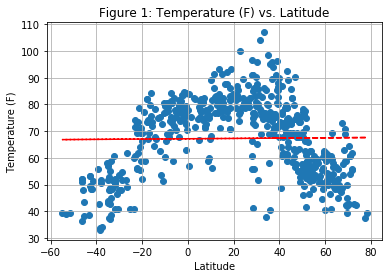

In [199]:
plt.scatter(weather_data['latitude'], 
            weather_data['temperature_f'], 
            marker = "o")


plt.grid(True)
plt.title("Figure 1: Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

reg_temperature = np.polyfit(weather_data['latitude'], 
                             weather_data['temperature_f'], 
                             1)

temperature_hat = np.poly1d(reg_temperature)

plt.plot(weather_data['latitude'],
         temperature_hat(weather_data['latitude']),
         "r--")

# Save the Figure
plt.savefig("../Images/temp.png")
plt.show()

#### Latitude vs. Humidity Plot

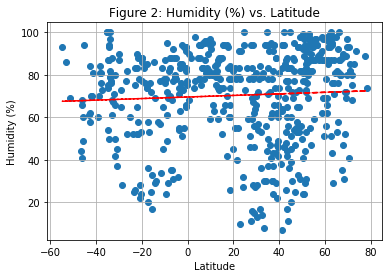

In [200]:
plt.scatter(weather_data['latitude'], 
            weather_data['humidity_perc'], 
            marker = "o")


plt.grid(True)
plt.title("Figure 2: Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


reg_humidity = np.polyfit(weather_data['latitude'], 
                          weather_data['humidity_perc'], 
                          1)

humidity_hat = np.poly1d(reg_humidity)

plt.plot(weather_data['latitude'],
         humidity_hat(weather_data['latitude']),
         "r--")


# Save the Figure
plt.savefig("../Images/humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

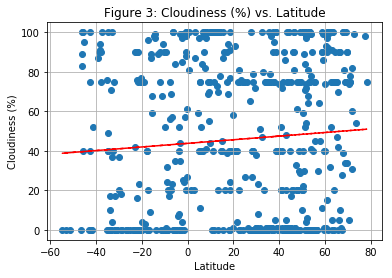

In [201]:
plt.scatter(weather_data['latitude'], 
            weather_data['cloudiness_perc'], 
            marker = "o")


plt.grid(True)
plt.title("Figure 3: Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

reg_cloud = np.polyfit(weather_data['latitude'], 
                       weather_data['cloudiness_perc'], 
                       1)

cloudiness_hat = np.poly1d(reg_cloud)
plt.plot(weather_data['latitude'],
         cloudiness_hat(weather_data['latitude']),
         "r--")

# Save the Figure
plt.savefig("../Images/cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

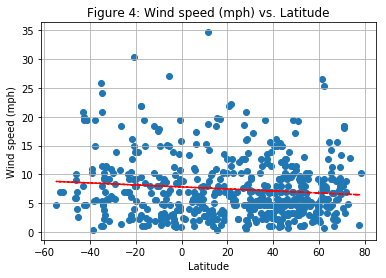

In [202]:
plt.scatter(weather_data['latitude'], 
            weather_data['wind_speed_mph'], 
            marker = "o")


plt.grid(True)
plt.title("Figure 4: Wind speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")

reg_wind_speed = np.polyfit(weather_data['latitude'], 
                            weather_data['wind_speed_mph'], 
                            1)

reg_wind_hat = np.poly1d(reg_wind_speed)

plt.plot(weather_data['latitude'], 
         reg_wind_hat(weather_data['latitude']),
         "r--")


# Save the Figure
plt.savefig("../Images/wind.png")
plt.show()

## Conclusions

* Figure 1 indicates that the temperature (in F) increases as the latitude approximates 0 (i.e., the Ecuador). Notice that this holds true, regardless of the direction in which 0 is being approximated (i.e. approximating the Ecuador from the North or the Sound Pole), thus he hyperbolic pattern observed.

* Humidity and Cloudintes (both in %) seem to be slightly more prevalent in the Northern Hemisphere (see Figure 2 and Figure 3)

* From Figure 4 we can infere the the Southern Hemisphere experiences slightly higher wind speeds  
